# Part 1 (50 points)

Normalization and Standardization

Take the iris data set and create two new .csv data sets (25 points each). One that normalizes all columns to have values between 0 and 1 and a second that standardizes all columns to have a mean of 0 and standard deviation of 1. Push both files to github.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv("data/Iris.csv")

# Separate features and labels
df_features = df.drop(columns=["Species"])
df_labels = df["Species"]

# Normalizes all columns to have values between 0 and 1
normalized_df = pd.DataFrame(MinMaxScaler().fit_transform(df_features), columns=df_features.columns)
normalized_df["Species"] = df_labels
normalized_df.to_csv("data/iris_normalized.csv", index=False)

# Standardizes all columns to have a mean of 0 and standard deviation of 1
standardized_df = pd.DataFrame(StandardScaler().fit_transform(df_features), columns=df_features.columns)
standardized_df["Species"] = df_labels
standardized_df.to_csv("data/iris_standardized.csv", index=False)

After loading the Iris dataset, all numeric columns were separated from the categorical `Species` column.

For the first version of normalizing all columns between 0 and 1, `MinMaxScaler` was used to normalize the features and saves the result as `iris_normalized.csv` under the data folder.

For another version of standardization to have a mean of 0 and standard deviation of 1, `StandardScaler` was used for standardization and saves the output as `iris_standardized.csv` under the data folder as well.

# Part 2 (50 points)

ER Diagram

Create an ER diagram that models a zoo: Define at least three entities that have several attributes for each entity, their relationship between entities, and their constraints.  Argue your decisions.  You will graded based on your explanation on why you chose certain constraints.  What to submit Either create a markdown readme file that has a copy of your ER diagram and explanation or .pdf version and push that to github.  Please also submit a link to your github submission to Canvas as well.  This helps the TA grade faster.

### Entity & Attributes
1. **Animal**
- `Animal_ID` (Primary Key)
- `Name`
- `Gender`
- `Age`
- `Species`
- `Enclosure_ID` (Foreign Key referencing Enclosure)

2. **Enclosure**
- `Enclosure_ID` (Primary Key)
- `Type` (like aquarium or aviary)
- `Capacity` (Maximum number of animals)
- `Location`

3. **Zookeeper**
- `Zookeeper_ID` (Primary Key)
- `Name`
- `Start_Date` (the first date to start this job)

4. **Zookeeper_Enclosure (Junction Table)**
- Zookeeper_ID (Foreign Key referencing Zookeeper)
- Enclosure_ID (Foreign Key referencing Enclosure)

### Relationship & Constraint
1. **Animal ↔ Enclosure (Many-to-One Relationship)**
- Each animal must belong to one enclosure.
- Each enclosure can hold multiple animals, depending on its capacity.
**Constraint:**
- The number of animals in an enclosure cannot exceed its capacity.
- The main reason is to ensure that animals have enough space, maintaining zoo regulations and promising animal welfare.

2. **Zookeeper ↔ Enclosure (Many-to-Many Relationship)**
- One zookeeper can be responsible for multiple enclosures.
- Each enclosure can have multiple assigned zookeepers.
**Constraint:**
- A zookeeper cannot manage more than a reasonable number (e.g. 5) of enclosures. For example, one zookeeper cannot be responsible for all enclosures at the same time.
- Each enclosure must have at least one assigned zookeeper to function well (support animal life).
- The main reason is to provide work-life balance for zookeepers as well as ensuring all animals receiving proper management and attention.

3. **Zookeeper ↔ Animal (Many-to-Many Relationship)**
- A zookeeper can take care of multiple animals.
- An animal can be taken cared by multiple zookeepers.
**Constraint:**
- An animal must have at least one assigned zookeeper.
- The main reason is to ensure each animal has received adequate attention by the assigned caretakers for promising animal welfare.

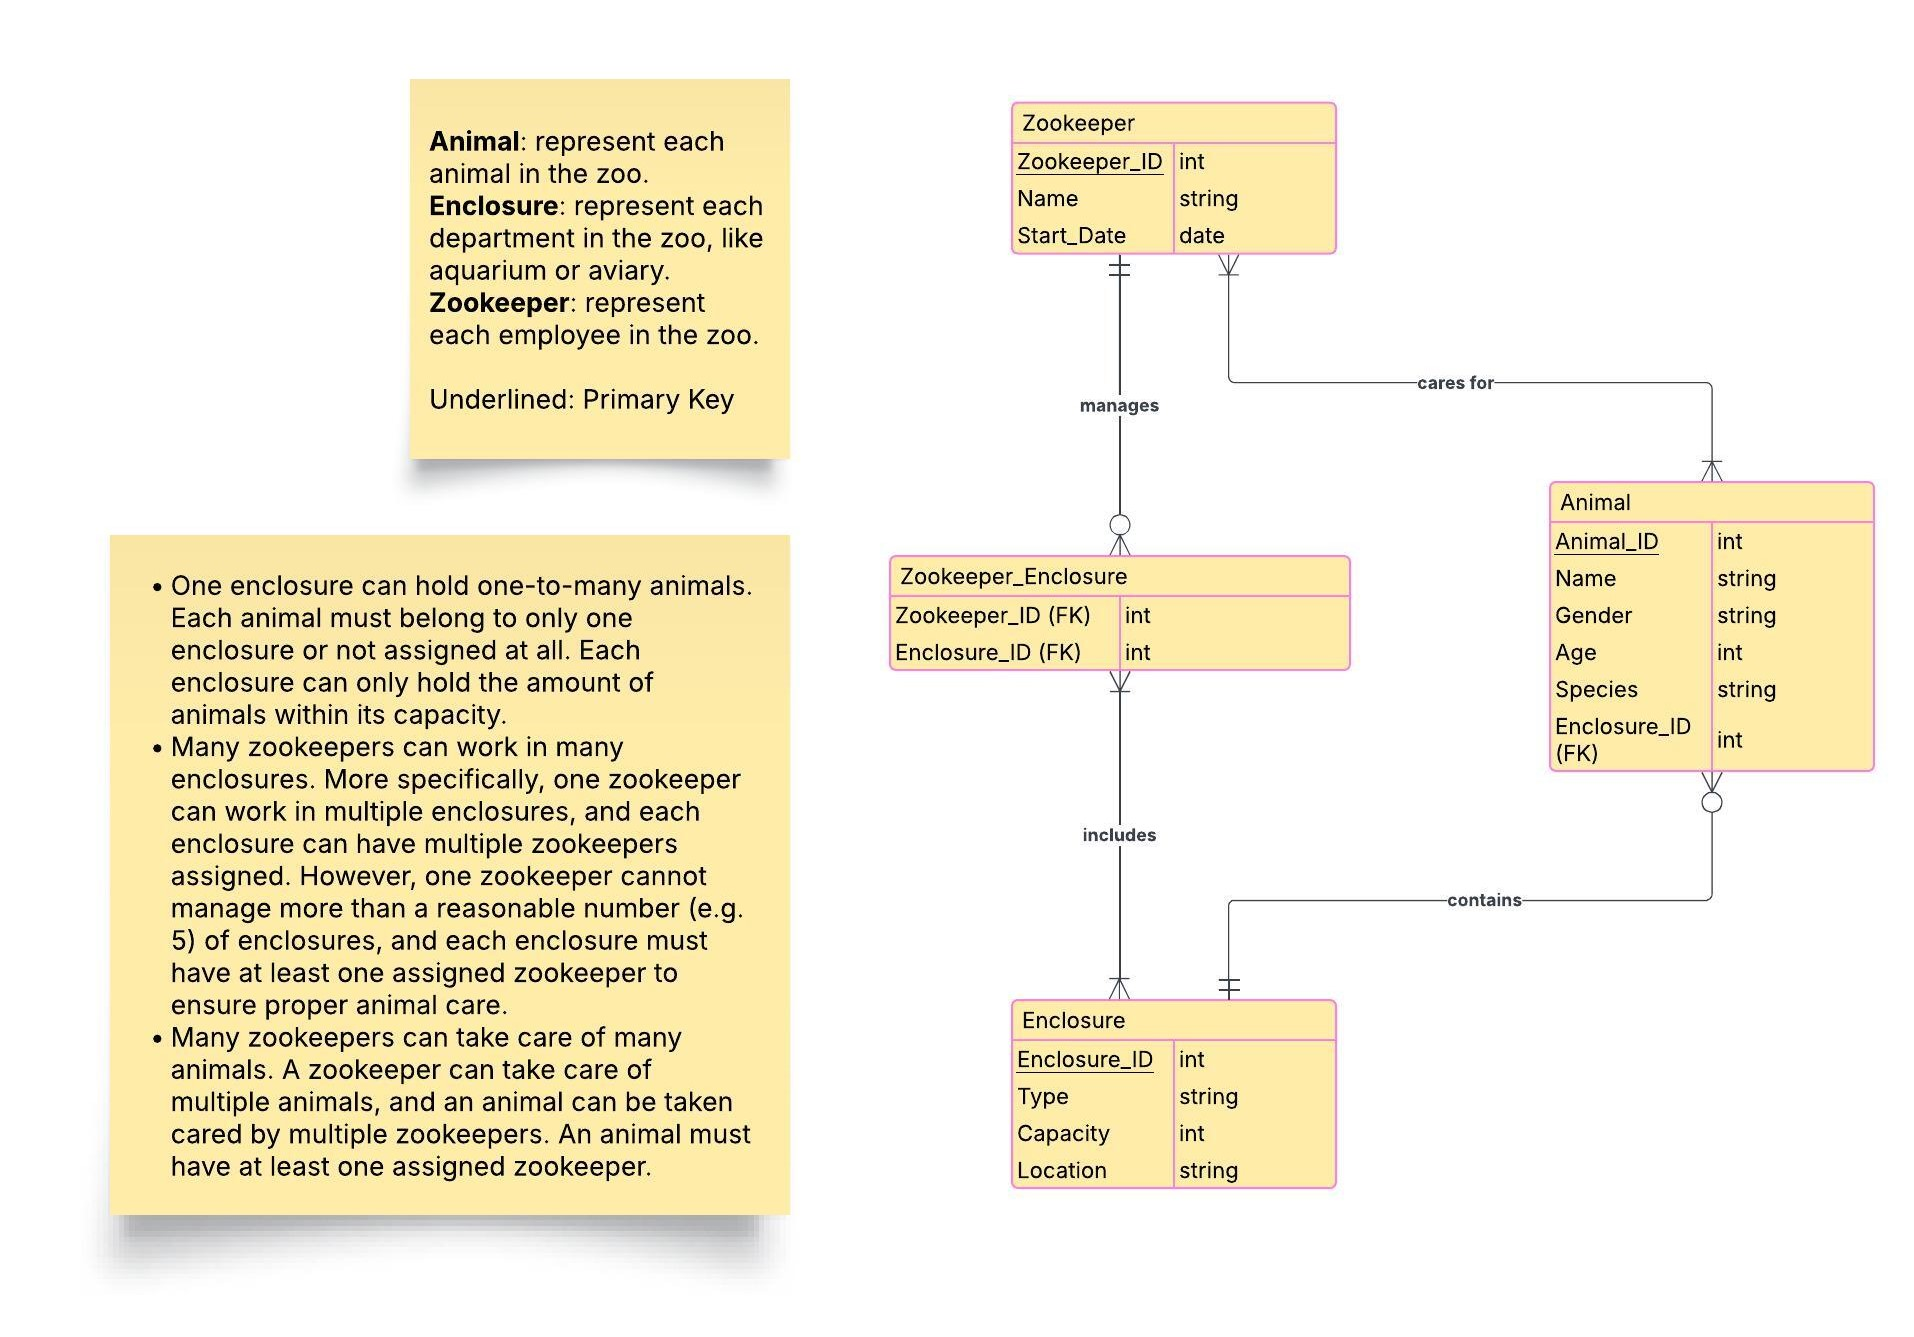